### Exploratory Data Analysis and data pre-processing

Objective: Analysis of the Health Insurance Lead Prediction Dataset and pre-processing of the data for use in the project


In [84]:
#Importing most used modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik
#sns.set_palette(sns.cubehelix_palette(start=5, rot=.1, dark=.05, light=.75, reverse=True))
custom_palette = sns.cubehelix_palette(start=5, rot=.1, dark=.05, light=.75, reverse=True)
cmap = sns.cubehelix_palette(start=5, rot=.1, dark=.05, light=.75, reverse=True, as_cmap=True)
#sns.set_palette(sns.color_palette("dark:#5A9"))

In [86]:
cmap = sns.cubehelix_palette(start=5, rot=.1, dark=.05, light=.75, reverse=True, as_cmap=True)

In [80]:
#print(sns.cubehelix_palette(start=2, rot=.1, dark=.05, light=.95, reverse=True))

### 1. Loading the data

In [2]:
#loading the raw data
df = pd.read_csv("datasets/raw/Health Insurance Lead Prediction Raw Data.csv")
df

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


From the dataset info, here are the descriptive information of the columns:

 | Variable | Definition | 
 | --- | --- |
 | ID Unique | Identifier for a row | 
 | City_Code | Code for the City of the customers | 
 | Region_Code | Code for the Region of the customers | 
 | Accomodation_Type | Customer Owns or Rents the house | 
 | Reco_Insurance_Type | Joint or Individual type for the recommended insurance | 
 | Upper_Age | Maximum age of the customer | 
 | Lower_Age | Minimum age of the customer | 
 | Is_Spouse | If the customers are married to each other (in case of joint insurance) | 
 | Health_Indicator | Encoded values for health of the customer | 
 | Holding_Policy_Duration | Duration (in years) of holding policy (a policy that customer has already subscribed to with the company) | 
 | Holding_Policy_Type | Type of holding policy | 
 | Reco_Policy_Cat | Encoded value for recommended health insurance | 
 | Reco_Policy_Premium Annual | Premium  for the recommended health insurance | 
 | Response (Target) | 1 or 0 if the customer show interest in the recommended policy or not |

In [3]:
#Checking types of data and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,50882.0,25441.500000,14688.512535,1.0,12721.25,25441.5,38161.75,50882.0
Region_Code,50882.0,1732.788707,1424.081652,1.0,523.00,1391.0,2667.00,6194.0
Upper_Age,50882.0,44.856275,17.310271,18.0,28.00,44.0,59.00,75.0
Lower_Age,50882.0,42.738866,17.319375,16.0,27.00,40.0,57.00,75.0
Holding_Policy_Type,30631.0,2.439228,1.025923,1.0,1.00,3.0,3.00,4.0
Reco_Policy_Cat,50882.0,15.115188,6.340663,1.0,12.00,17.0,20.00,22.0
Reco_Policy_Premium,50882.0,14183.950069,6590.074873,2280.0,9248.00,13178.0,18096.00,43350.4
Response,50882.0,0.239947,0.427055,0.0,0.00,0.0,0.00,1.0


In [5]:
#Checking percent of NaN values
(df.isna().sum() / len(df)) * 100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [6]:
#Checking balance of target value
df['Response'].value_counts() / len(df) * 100

0    76.005267
1    23.994733
Name: Response, dtype: float64

In [7]:
#Checking if there are duplicate rows
df[df.duplicated()].shape

(0, 14)

In [8]:
#ID column can be dropped
df.drop(columns=['ID'], inplace=True)

First impressions:

* City_Code, Accomodation_Type, Reco_Insurance_Type, Is_Spouse, Health Indicator are categorical data types.
* Some columns are missing lots of values.
* Dataset is unbalanced. There are more negative responses than postive ones.

### 2. Exploratory Data Analysis

In [10]:
#Checking the correlation of the data
df.corr().round(2)

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Region_Code,1.00,-0.01,-0.01,0.01,-0.07,-0.01,0.00
Upper_Age,-0.01,1.00,0.92,0.14,0.03,0.79,0.00
Lower_Age,-0.01,0.92,1.00,0.12,0.02,0.62,-0.00
Holding_Policy_Type,0.01,0.14,0.12,1.00,0.08,0.12,0.01
Reco_Policy_Cat,-0.07,0.03,0.02,0.08,1.00,0.06,0.11
Reco_Policy_Premium,-0.01,0.79,0.62,0.12,0.06,1.00,0.01
Response,0.00,0.00,-0.00,0.01,0.11,0.01,1.00


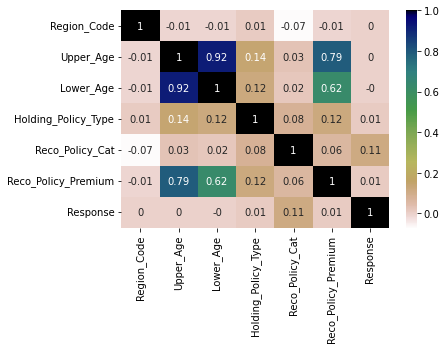

In [102]:
#Checking for correlations
sns.heatmap(df.corr().round(2), annot=True, cmap='gist_earth_r');

In [108]:
#The data also has categoric variables. We can check for correlations ushing the phik matrix.
#Source: https://arxiv.org/abs/1811.11440
phik_matrix = df.phik_matrix().round(3)


interval columns not set, guessing: ['Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response']


In [106]:
df.phik_matrix().round(3)

interval columns not set, guessing: ['Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response']


,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
City_Code,1.000,0.425,0.228,0.128,0.241,0.233,0.122,0.119,0.183,0.355,0.504,0.217,0.000
Region_Code,0.425,1.000,0.019,0.020,0.023,0.015,0.018,0.028,0.035,0.040,0.155,0.031,0.000
Accomodation_Type,0.228,0.019,1.000,0.304,0.569,0.503,0.295,0.128,0.233,0.230,0.080,0.473,0.004
Reco_Insurance_Type,0.128,0.020,0.304,1.000,0.320,0.203,0.983,0.088,0.083,0.125,0.041,0.807,0.014
Upper_Age,0.241,0.023,0.569,0.320,1.000,0.977,0.284,0.103,0.357,0.154,0.073,0.757,0.020
Lower_Age,0.233,0.015,0.503,0.203,0.977,1.000,0.165,0.109,0.314,0.144,0.084,0.703,0.009
Is_Spouse,0.122,0.018,0.295,0.983,0.284,0.165,1.000,0.110,0.075,0.138,0.045,0.706,0.000
Health Indicator,0.119,0.028,0.128,0.088,0.103,0.109,0.110,1.000,0.030,0.144,0.086,0.081,0.000
Holding_Policy_Duration,0.183,0.035,0.233,0.083,0.357,0.314,0.075,0.030,1.000,0.161,0.088,0.242,0.022
Holding_Policy_Type,0.355,0.040,0.230,0.125,0.154,0.144,0.138,0.144,0.161,1.000,0.311,0.123,0.000


In [ ]:
phik.report.plot_corre